In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
df=pd.read_csv(r"C:\Users\hp\Downloads\airquality.csv")

In [5]:
df.head()

,Unnamed: 0,Ozone,Solar.R,Wind,Temp,Month,Day,Humidity
0,1,41.0,190.0,7.4,67,5,1,High
1,2,36.0,118.0,8.0,72,5,2,low
2,3,12.0,149.0,12.6,74,5,3,low
3,4,18.0,313.0,11.5,62,5,4,High
4,5,NaN,NaN,14.3,56,5,5,Medium


In [6]:
df.isnull().sum()

Unnamed: 0     0
Ozone         37
Solar.R        7
Wind           0
Temp           0
Month          0
Day            0
Humidity       9
dtype: int64

In [8]:
df.drop("Unnamed: 0",axis=1)

,Ozone,Solar.R,Wind,Temp,Month,Day,Humidity
0,41.0,190.0,7.4,67,5,1,High
1,36.0,118.0,8.0,72,5,2,low
2,12.0,149.0,12.6,74,5,3,low
3,18.0,313.0,11.5,62,5,4,High
4,NaN,NaN,14.3,56,5,5,Medium
...,...,...,...,...,...,...,...
148,30.0,193.0,6.9,70,9,26,low
149,NaN,145.0,13.2,77,9,27,HIgh
150,14.0,191.0,14.3,75,9,28,HIgh
151,18.0,131.0,8.0,76,9,29,low


In [12]:
df["Ozone"]=df["Ozone"].fillna(df["Ozone"].mean())
df["Solar.R"]=df["Solar.R"].fillna(df["Solar.R"].mean())
df["Humidity"]=df["Humidity"].fillna(df["Humidity"].mode()[0])

In [13]:
df.isnull().sum()

Unnamed: 0    0
Ozone         0
Solar.R       0
Wind          0
Temp          0
Month         0
Day           0
Humidity      0
dtype: int64

In [14]:
from sklearn.preprocessing import LabelEncoder

In [15]:
label=LabelEncoder()

In [17]:
df["Humidity"]=label.fit_transform(df["Humidity"])
df["Humidity"].unique()

array([1, 4, 3, 2, 0], dtype=int64)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  153 non-null    int64  
 1   Ozone       153 non-null    float64
 2   Solar.R     153 non-null    float64
 3   Wind        153 non-null    float64
 4   Temp        153 non-null    int64  
 5   Month       153 non-null    int64  
 6   Day         153 non-null    int64  
 7   Humidity    153 non-null    int64  
dtypes: float64(3), int64(5)
memory usage: 9.7 KB


In [19]:
sub1=df.iloc[10:20,1:4]

In [20]:
sub2=df.iloc[15:30,1:3]

In [23]:
sub3=pd.concat([sub1,sub2])
sub3.shape

(25, 3)

In [24]:
corr=df.corr()

<AxesSubplot:>

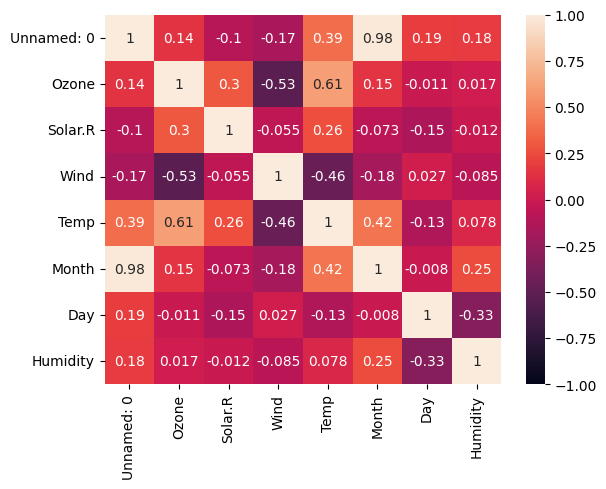

In [52]:
import seaborn as sns
sns.heatmap(corr,vmin=-1,vmax=1,annot=True)

In [28]:
from sklearn.model_selection import train_test_split


In [37]:
x=df[["Ozone"]]
y=df[["Temp"]]

In [38]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2)

In [39]:
from sklearn.linear_model import LinearRegression
linear=LinearRegression()

In [40]:
model=linear.fit(xtrain,ytrain)

In [41]:
ypred=model.predict(xtest)

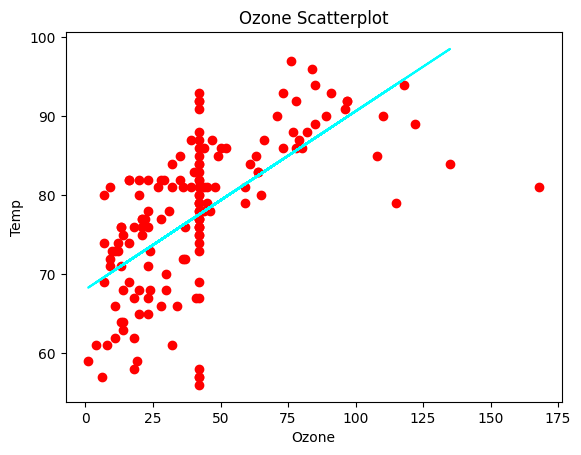

In [47]:
plt.scatter(x,y,color="red")
plt.plot(xtrain,linear.predict(xtrain),color="Cyan")
plt.title("Ozone Scatterplot")
plt.xlabel("Ozone")
plt.ylabel("Temp")
plt.show()

In [49]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
mse=mean_squared_error(ytest,ypred)
mae=mean_absolute_error(ytest,ypred)
r2=r2_score(ytest,ypred)
rmse=np.sqrt(mse)

In [50]:
print("MSE",mse)
print("MAE",mae)
print("R2 Score",r2)
print("RMSE",rmse)

MSE 64.4056333037927
MAE 6.173238700119817
R2 Score 0.3125659335716292
RMSE 8.025312037783497
